#### 주성분 분석(PCA, Principal component analysis)
 - 직교 변환을 사용하여 상관관계를 가지는 관측값 변수들의 집합을 주성분이라고 하는 선형 상관관계를 가지지 않는 변수, 즉 주성분의 집합으로 바꾸는 통계적 절차
 - 첫 번째 주성분이 (자료의 변동성을 가장 많이 설명하도록) 가장 큰 분산을 가지고 그다음 성분이 이전의 주성분과 직교한다는 가정하에 가장 큰 분산을 가지도록 정의한다.*

*https://ko.wikipedia.org/wiki/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D

# 11.3.1 DAX 지수와 구성 종목 

EX) 30개의 주식으로 구성된 주가지수가 있다 -> 모든 주가의 움직임이 지수의 움직임을 결정 & 개별 주식의 움직임들은 특정 조건, 상황에 의해 상관관계를 가진다 -> 주가 지수 움지임을 설명하기위해 30개의 상관관계를 가지는 요인을 모두 사용하는것은 어렵다. -> 주성분 분석

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()
from sklearn.decomposition import KernelPCA

In [2]:
symbols = ['MUV2.DE', 'DB1.DE', 'ADS.DE', 'DBK.DE', 'SAP.DE',
           'DWNI.DE', 'MTX.DE', 'BMW.DE', 'DTE.DE', 'ALV.DE',
           'BAS.DE', 'RWE.DE', 'LIN.DE', 'MRK.DE', 'DPW.DE',
           'FRE.DE', 'FME.DE', 'SIE.DE', 'VOW3.DE', 'IFX.DE',
           'HEI.DE', 'DAI.DE', 'DHER.DE', 'ENR.DE', 'EOAN.DE',
           'BAYN.DE', 'CON.DE', '^GDAXI']
# 'HEN3.DE', 'VNA.DE', '1COV.DE'

In [3]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.get_data_yahoo(sym, data_source = 'yahoo')['Adj Close']
data = data.dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
dax = pd.DataFrame(data.pop('^GDAXI')) # pop(a) : a항목 삭제 

In [5]:
data[data.columns[:]].head()

,MUV2.DE,DB1.DE,ADS.DE,DBK.DE,SAP.DE,DWNI.DE,MTX.DE,BMW.DE,DTE.DE,ALV.DE,...,SIE.DE,VOW3.DE,IFX.DE,HEI.DE,DAI.DE,DHER.DE,ENR.DE,EOAN.DE,BAYN.DE,CON.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,218.100006,151.199997,281.200012,7.074,134.160004,42.410000,141.022461,62.000000,13.778479,164.880005,...,105.844116,133.832611,24.034485,52.080002,44.878506,99.080002,22.000000,9.390,53.509998,92.139999
2020-09-30,216.600006,149.800003,276.100006,7.190,132.759995,42.689999,141.072144,61.990002,13.792956,163.619995,...,105.103668,132.539993,23.964920,52.320000,45.217381,98.120003,23.000000,9.428,53.310001,92.480003
2020-10-01,215.600006,148.199997,278.899994,7.100,133.740005,43.230000,143.357117,62.660000,13.966696,162.179993,...,103.915077,134.300003,25.783531,51.279999,45.914768,98.800003,22.610001,9.528,46.340000,95.300003
2020-10-02,216.199997,148.350006,276.899994,7.196,132.759995,43.680000,140.823776,62.360001,14.005305,162.800003,...,103.155144,132.000000,25.261799,51.740002,45.919682,98.500000,22.420000,9.694,44.935001,96.260002
2020-10-05,221.899994,149.000000,273.500000,7.360,132.399994,44.060001,144.350586,64.029999,14.179044,166.520004,...,104.558083,134.699997,25.549994,52.660000,46.980503,98.279999,21.750000,9.718,46.770000,98.320000


# 11.3.2 주성분 분석 적용
 - 주성분 분석 : 정규화된 자료를 다룬다.

In [6]:
scale_function = lambda x : (x - x.mean()) / x.std()

In [7]:
pca = KernelPCA().fit(data.apply(scale_function))

In [8]:
len(pca.lambdas_)

27

In [10]:
pca.lambdas_[:10].round()

array([2037.,  601.,  295.,  223.,  185.,  144.,  111.,   68.,   44.,
         24.])

In [11]:
get_we = lambda x : x / x.sum() # 상대적인 중요도

In [12]:
get_we(pca.lambdas_)[:10]

array([0.5313714 , 0.15664664, 0.07706989, 0.05821905, 0.04813919,
       0.03756759, 0.0290317 , 0.01777784, 0.01147323, 0.00633576])

In [13]:
get_we(pca.lambdas_)[:5].sum()

0.8714461723416865

몇가지 안되는 주성분만으로 변동치의 대부분을 설명할 수 있다.

# 11.3.3 주성분 지수 구성

1. 하나의 성분만을 가지는 주성분 지수

In [14]:
pca = KernelPCA(n_components = 1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

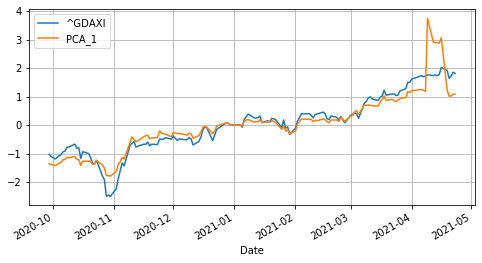

In [16]:
dax.apply(scale_function).plot(figsize = (8, 4))
plt.grid(True)

2. 여러개의 성분을 가지는 주성분 지수

In [17]:
pca = KernelPCA(n_components = 5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights) # 주성분의 수가 늘었기때문에 dot을 쓰게 된다.

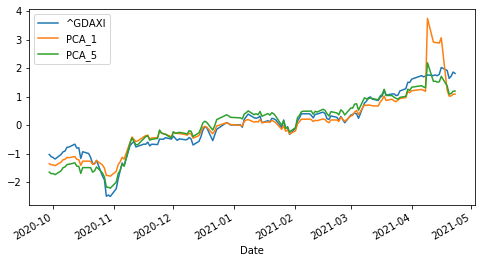

In [22]:
dax.apply(scale_function).plot(figsize = (8, 4))

In [21]:
dax

,^GDAXI,PCA_1,PCA_5
Date,,,
2020-09-29,12825.820312,368.695939,226.165136
2020-09-30,12760.730469,367.164732,224.970542
2020-10-01,12730.769531,366.777175,225.003896
2020-10-02,12689.040039,365.542696,224.163781
2020-10-05,12828.309570,371.455170,227.244258
...,...,...,...
2021-04-19,15368.389648,493.008825,296.034878
2021-04-20,15129.509766,483.149776,289.392579
2021-04-21,15195.969727,483.476661,289.855573


In [23]:
import matplotlib as mpl

In [24]:
mpl_dates = mpl.dates.date2num(data.index)
mpl_dates

array([737697., 737698., 737699., 737700., 737703., 737704., 737705.,
       737706., 737707., 737710., 737711., 737712., 737713., 737714.,
       737717., 737718., 737719., 737720., 737721., 737724., 737725.,
       737726., 737727., 737728., 737731., 737732., 737733., 737734.,
       737735., 737738., 737739., 737740., 737741., 737742., 737745.,
       737746., 737747., 737748., 737749., 737752., 737753., 737754.,
       737755., 737756., 737759., 737760., 737761., 737762., 737763.,
       737766., 737767., 737768., 737769., 737770., 737773., 737774.,
       737775., 737776., 737777., 737780., 737781., 737782., 737787.,
       737788., 737789., 737794., 737795., 737796., 737797., 737798.,
       737801., 737802., 737803., 737804., 737805., 737808., 737809.,
       737810., 737811., 737812., 737815., 737816., 737817., 737818.,
       737819., 737822., 737823., 737824., 737825., 737826., 737829.,
       737830., 737831., 737832., 737833., 737836., 737837., 737838.,
       737839., 7378

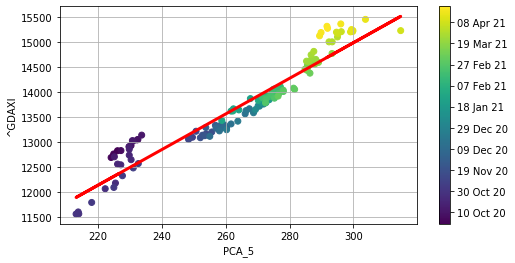

In [31]:
plt.figure(figsize = (8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c = mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'], dax['^GDAXI'], 1), dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw = 3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks = mpl.dates.DayLocator(interval = 20),
            format = mpl.dates.DateFormatter('%d %b %y'))

점이 몰려있는 곳이 변동이 있었음을 보여준다.

만약, 주성분 분석 지수가 DAX 지수를 정확히 복제했다면 모든 점이 직선상에 존재해야한다. -> 향상 시켜보자

전체 구간을 두개의 구간으로 나눈 후 초기 구간과 후기 구간에 대해 각각 회귀분석한다.

In [47]:
cut_date = '2021/1/12'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca, dax['^GDAXI'][dax.index < cut_date], 1),
                      early_pca)



In [48]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca, dax['^GDAXI'][dax.index >= cut_date], 1),
                      late_pca)

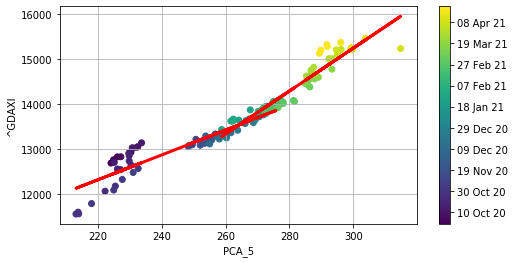

In [53]:
plt.figure(figsize = (8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c = mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw = 3)
plt.plot(late_pca, late_reg, 'r', lw = 3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks = mpl.dates.DayLocator(interval = 20),
            format = mpl.dates.DateFormatter('%d %b %y'))